### Module Import


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

#### (a) Plot the Histogram 관련 메서드

In [2]:
def createHistogram(imgArray):
    bright = np.zeros(256, np.uint16)
    for row in range(imgArray.shape[0]):
        for col in range(imgArray.shape[1]):
            curPix = imgArray[row, col]
            bright[curPix] = bright[curPix] + 1
            
    return bright

def printGraph(histogram):
    x = np.arange(256)
    plt.bar(x, histogram, width=1.0)
    plt.show()

def showImg(imgArray):
    image = Image.fromarray(imgArray)
    image.show()

#### (b) Histogram Equalization 관련 메서드

In [3]:
def prefixSum(histogram):
    sum = np.zeros(255, np.uint32)
    sum[0] = histogram[0]
    for i in range(1, 255):
        sum[i] = sum[i-1] + histogram[i]
    return sum

def createLUT(histogram):
    # 누적합 구하기
    sum = prefixSum(histogram)
    nb_pix = sum[-1]
    lut = np.zeros(255, np.uint32)
    for i in range(255):
        # 정규화된 누적 합 = (누적합 / 픽셀 수) * 최대 명도 & 반올림을 위한 +0.5 = LUT
        lut[i] = (sum[i] / nb_pix)*255 + 0.5 

    return lut

def createEQ(imgArray):
    image_EQ = imgArray.copy()
    basic_histogram = createHistogram(image_EQ)
    lut = createLUT(basic_histogram)

    for row in range(image_EQ.shape[0]):
        for col in range(image_EQ.shape[1]):
            curBright = image_EQ[row, col]
            image_EQ[row, col] = lut[curBright]

    return image_EQ

#### (c) Basic Contrast Stretching 관련 메서드

In [4]:
def createBasicContrastStretching(imgArray):
    image_Stretching = imgArray.copy()
    low = np.min(image_Stretching)
    high = np.max(image_Stretching)
    mult = 255 / (high - low)
    for row in range(image_Stretching.shape[0]):
        for col in range(image_Stretching.shape[1]):
            image_Stretching[row, col] = (image_Stretching[row, col] - low) * mult
    
    return image_Stretching

#### (d) Ends-in Contrast Stretching 관련 메서드

In [5]:
def createEndsIn(imgArray):
    image_EndsIn = imgArray.copy()
    low = 50
    high = 190
    mult = 255 / (high - low)
    for row in range(image_EndsIn.shape[0]):
        for col in range(image_EndsIn.shape[1]):
            x = image_EndsIn[row, col]
            if x<low:
                image_EndsIn[row, col] = 0
            elif x>high:
                image_EndsIn[row, col] = 255
            else:  
                image_EndsIn[row, col] = (image_EndsIn[row, col] - low) * mult
    return image_EndsIn


### 결과 출력

In [6]:
# load image
file = "./lena_bmp_512x512_new.bmp"
img = Image.open(file)
img_np = np.array(img)

#### Histogram

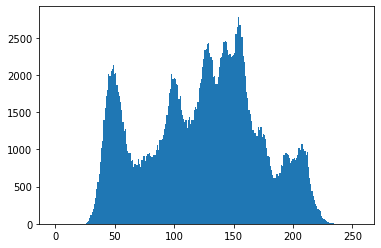

In [7]:
basic_histogram = createHistogram(img_np)
printGraph(basic_histogram)
imshow(img_np, cmap='gray')

#### Histogram Equalization

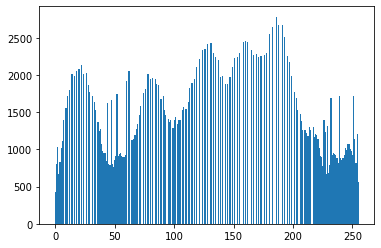

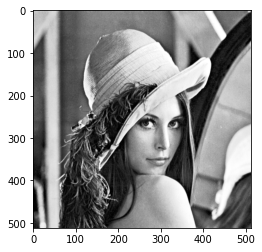

In [23]:
img_EQ = createEQ(img_np)
EQ_histogram = createHistogram(img_EQ)
printGraph(EQ_histogram)
imshow(img_EQ, cmap='gray')

#### Basic Contrast Stretching

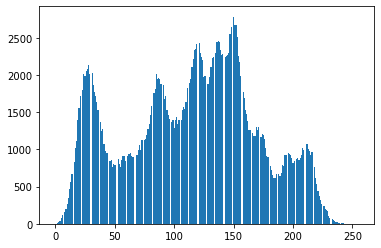

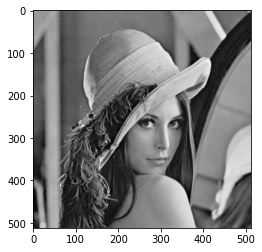

In [22]:
img_ContrastStretching = createBasicContrastStretching(img_np)
contrast_histogram = createHistogram(img_ContrastStretching)
printGraph(contrast_histogram)
imshow(img_ContrastStretching, cmap='gray')

#### Ends-in Contrast Stretching

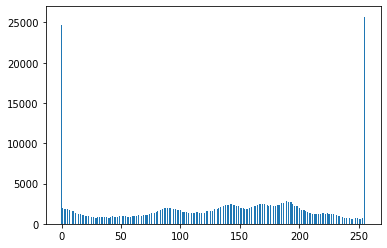

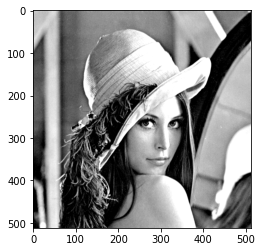

In [21]:
img_EndsIn = createEndsIn(img_np)
endsIn_histogram = createHistogram(img_EndsIn)
printGraph(endsIn_histogram)
imshow(img_EndsIn, cmap='gray')

#### 사진 저장


In [12]:
save_EQ = Image.fromarray(img_EQ)
save_ContrastStretching = Image.fromarray(img_ContrastStretching)
save_EndsIn = Image.fromarray(img_EndsIn)

save_EQ.save("Image Equalization.bmp", 'BMP')
save_ContrastStretching.save("Image ContrastStretching.bmp", 'BMP')
save_EndsIn.save("Image EndsIn.bmp", 'BMP')